# Fashion-MNIST Image Classification using Deep Learning with Python

## Problem Statement

In this project, we will implement a feedforward neural network model  on the Fashion-MNIST dataset and will build a Feed Forward neural network model to classify images of clothing on train data and make predictions on test data using Hyperparameter tuning techniques to achieve the best accuracy and performance.

## Dataset Description



*   Fashion-MNIST dataset consists of 60,000 training images and 10,000 test images of fashion product database images like Shirts, bags,sneakers etc. 

*   Fashion MNIST dataset can be accessed directly from [Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) TensorFlow using Keras API.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.





<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Image Source:</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


## Importing Libraries

We train a Feed Forward neural network model to classify images of clothing, like sneakers and shirts on train data and make predictions on test data. We use tf.keras, a high-level API to build and train models in TensorFlow.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
print(tf.__version__)

2.8.0


## Loading the Fashion MNIST dataset from Keras API

We use the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show 10 different categories of clothing images as shown below,


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

After loading the dataset from Keras API, it returns four NumPy arrays:

- X_train and y_train arrays are the training set arrays used to train the neural network model on training data images.
- X_test and y_test arrays are the testing set arrays used to make predictions on the testing data images.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Explore the dataset
# Check the shape and size of X_train, X_test, y_train, y_test
print ("Number of observations in training data: " + str(len(X_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in X_train:" + str(X_train[0].shape))
print("-------------------------------------------------------------\n")
print ("Number of observations in test data: " + str(len(X_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in X_test:" + str(X_test[0].shape))

Number of observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in X_train:(28, 28)
-------------------------------------------------------------

Number of observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in X_test:(28, 28)


Each image is mapped to a single label. Since the class labels are not included with the dataset, we store them here to use later when plotting the images.

In [ ]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

## Data Visualisation of Images in Training Data

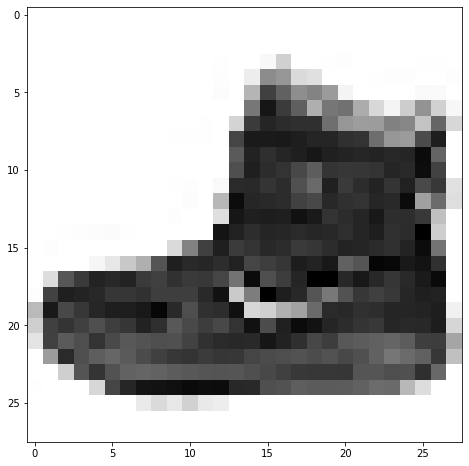

In [ ]:
#Plotting First Image from Training Data
plt.figure(figsize = (8,8))
plt.imshow(X_train[0],cmap = 'Greys');

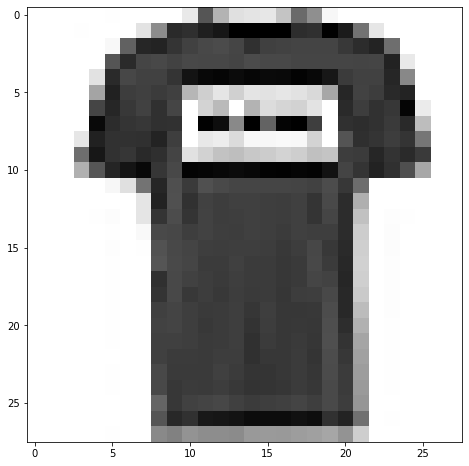

In [ ]:
#Plotting Second Image from Training Data
plt.figure(figsize = (8,8))
plt.imshow(X_train[1],cmap = 'Greys');

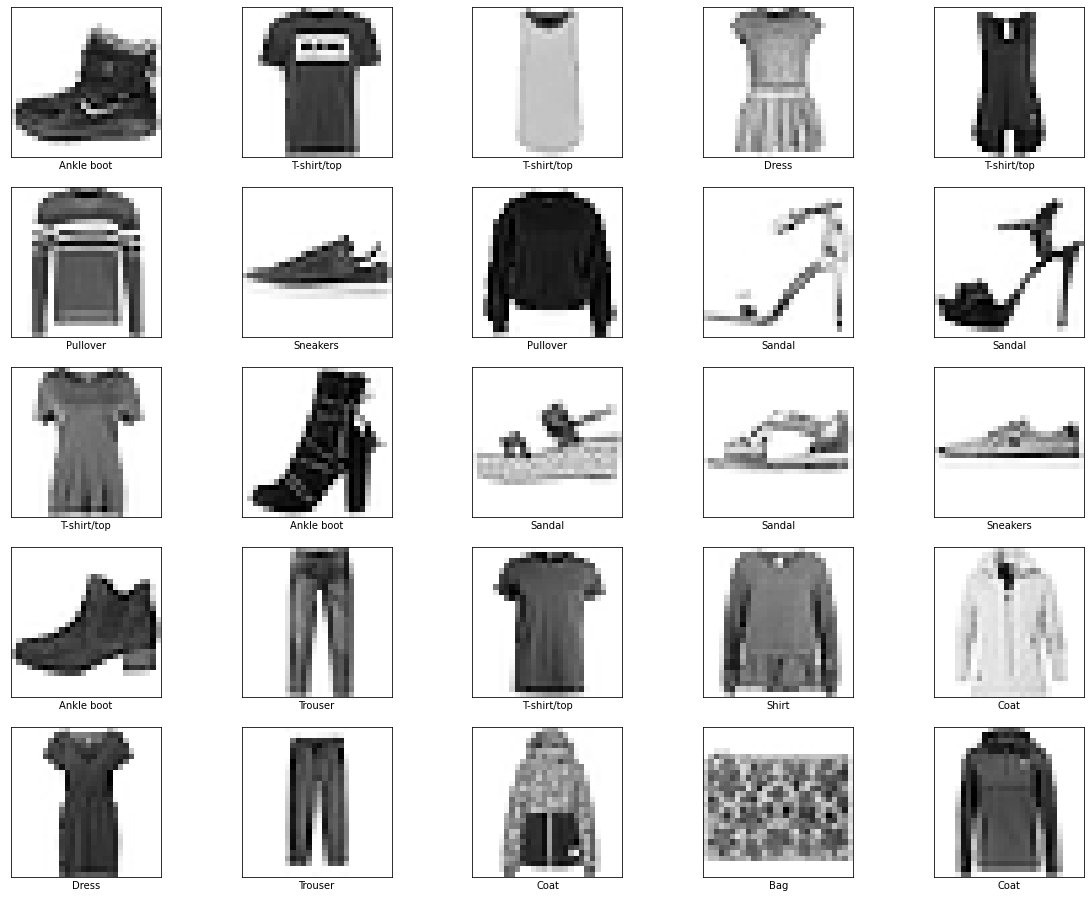

In [ ]:
#Plotting first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(20,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='Greys')
    plt.xlabel(class_labels[y_train[i]])
plt.show()

## Data Preprocessing

The data must be preprocessed before training the neural network model. If we check the first image in the training set, you will see that the pixel values fall in the range of 0 to 255. 

Hence, we apply feature scaling to scale these values to a range of 0 to 1 before feeding them to the neural network model. So, divide the values by 255 and it's important that the training set and the testing set be preprocessed in the same way.



In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0  

In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

## Model Building

Building the neural network model requires configuring the layers of the model and then compiling the model.

### Neural Network Architecture

- The first layer in the network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array of 28 x 28 pixels to a one-dimensional array of 28 x 28 = 784 pixels.

- After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected neural layers and it has 128 neurons.

- The last layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes/categories in the dataset.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

### Compile the model

- **Loss function:** This measures how accurate the model is during training. We want to minimize this function to move the model in the right direction.

- **Optimizer:** This is how the model is updated based on the data it sees and its loss function.

- **Metrics:** Used to monitor the training and testing steps. We use accuracy as evaluation metric to check how much accurately the images are classified.

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Model Training

To start training, we use the model.fit method which is called because it "fits" the model to the training data and parameter with epochs = 50.

In [ ]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4959 - accuracy: 0.8264
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8653
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8773
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8856
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8906
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2808 - accuracy: 0.8960
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2683 - accuracy: 0.9008
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9043
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9065
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

### Model Evaluation

As the model training is completed, the loss and accuracy metrics are displayed. 

In [ ]:
#Model Accuracy Results
print("Results:")
print("---------------------")
scores_train = model.evaluate(X_train, y_train, verbose= 2)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))
scores_test = model.evaluate(X_test, y_test, verbose= 2)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1] * 100))

Results:
---------------------
1875/1875 - 2s - loss: 0.0884 - accuracy: 0.9678 - 2s/epoch - 1ms/step
Training Accuracy: 96.78%

313/313 - 1s - loss: 0.4963 - accuracy: 0.8908 - 623ms/epoch - 2ms/step
Testing Accuracy: 89.08%



We can observe that the accuracy of Training dataset is **96.78%** and testing dataset is **89.08%** which depicts the test dataset accuracy is less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is called **Overfitting**. 

**Overfitting** happens when a deep learning model performs worse on new  previously unseen data than it does on the training data. 

Most of the deep learning models tend to be good at fitting to the training data, but the real challenge is **Generalization**, not fitting.

Hence, to counter overfitting, we use different strategies and one of the techniques we use in this project is **Hyperparameter tuning** using **GridSearchCV**.

## Hyperparameter Tuning of the Neural Network Model using GridSearchCV

#### **Hyperparameter Tuning**

The process of selecting the right set of hyperparameters for ML/DL model is called **Hyperparameter tuning**.

Hyperparameters are the variables that govern the training process and the topology of a model. These variables remain constant over the training process and directly impact the performance of model.

#### **Grid Search**

Grid Search uses a different combination of all the specified hyperparameters and calculates the performance for each combination and selects the best value for the hyperparameters.

#### **Cross Validation**

In **GridSearchCV**, along with Grid Search, cross-validation is also performed. **Cross-Validation** is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. 

In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is **K-fold Cross-Validation**. It is an iterative process that divides the train data into k partitions. 

Hence, GridSearch along with cross-validation (GridSearchCV) technique takes huge time cumulatively to evaluate the best hyperparameters and build an optimised model.

### 1. Hyperparameter Tuning "Epochs"

In [ ]:
#import necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Start defining the model
def create_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128,kernel_initializer='normal',activation='relu'))
  model.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model

#create model
model= KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
epochs = [5,10,50,100]

# make a dictionary of the grid search parameters
param_grid = dict(epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START epochs=5....................................................
[CV 1/3; 1/4] END .....................epochs=5;, score=0.869 total time=  14.3s
[CV 2/3; 1/4] START epochs=5....................................................
[CV 2/3; 1/4] END .....................epochs=5;, score=0.874 total time=  14.1s
[CV 3/3; 1/4] START epochs=5....................................................
[CV 3/3; 1/4] END .....................epochs=5;, score=0.876 total time=  22.0s
[CV 1/3; 2/4] START epochs=10...................................................
[CV 1/3; 2/4] END ....................epochs=10;, score=0.871 total time=  42.5s
[CV 2/3; 2/4] START epochs=10...................................................
[CV 2/3; 2/4] END ....................epochs=10;, score=0.888 total time=  28.9s
[CV 3/3; 2/4] START epochs=10...................................................
[CV 3/3; 2/4] END ....................epochs=10;,

### 2. Hyperparameter Tuning "Batch Size"

In [ ]:
#Start defining the model
def create_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128,kernel_initializer='normal',activation='relu'))
  model.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model

#create model
model= KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10,20,50]
epochs = [50]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs= epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START batch_size=10, epochs=50....................................
[CV 1/3; 1/3] END .....batch_size=10, epochs=50;, score=0.882 total time= 6.5min
[CV 2/3; 1/3] START batch_size=10, epochs=50....................................
[CV 2/3; 1/3] END .....batch_size=10, epochs=50;, score=0.888 total time= 6.4min
[CV 3/3; 1/3] START batch_size=10, epochs=50....................................
[CV 3/3; 1/3] END .....batch_size=10, epochs=50;, score=0.882 total time= 6.5min
[CV 1/3; 2/3] START batch_size=20, epochs=50....................................
[CV 1/3; 2/3] END .....batch_size=20, epochs=50;, score=0.882 total time= 2.8min
[CV 2/3; 2/3] START batch_size=20, epochs=50....................................
[CV 2/3; 2/3] END .....batch_size=20, epochs=50;, score=0.891 total time= 2.8min
[CV 3/3; 2/3] START batch_size=20, epochs=50....................................
[CV 3/3; 2/3] END .....batch_size=20, epochs=50;, 

### 3. Hyperparameter Tuning "Learning Rate" and "Dropout Rate"

In [ ]:
# import necessary packages
from keras.layers import Dropout

epochs= 50
batch_size=50

#Start defining the model
def create_model(learn_rate,dropout_rate):
  model=Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))
  
  import tensorflow as tf
  opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model
 
# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
learn_rate = [0.00001, 0.0001, 0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2, 0.3]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START dropout_rate=0.0, learn_rate=1e-05.........................
[CV 1/3; 1/20] END dropout_rate=0.0, learn_rate=1e-05;, score=0.882 total time= 1.2min
[CV 2/3; 1/20] START dropout_rate=0.0, learn_rate=1e-05.........................
[CV 2/3; 1/20] END dropout_rate=0.0, learn_rate=1e-05;, score=0.890 total time= 1.4min
[CV 3/3; 1/20] START dropout_rate=0.0, learn_rate=1e-05.........................
[CV 3/3; 1/20] END dropout_rate=0.0, learn_rate=1e-05;, score=0.887 total time= 1.4min
[CV 1/3; 2/20] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 1/3; 2/20] END dropout_rate=0.0, learn_rate=0.0001;, score=0.883 total time= 1.4min
[CV 2/3; 2/20] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 2/3; 2/20] END dropout_rate=0.0, learn_rate=0.0001;, score=0.884 total time= 1.2min
[CV 3/3; 2/20] START dropout_rate=0.0, learn_rate=0.0001........................
[CV 3/3; 2/20] E

### 4. Hyperparameter Tuning "Activation Function" and "Kernel Initializer"

In [ ]:
# import necessary packages
from keras.layers import Dropout

# taken from previous results
epochs= 50
batch_size=50
learn_rate = 0.001
dropout_rate = 0.1

#Start defining the model
def create_model(activation,init):
  model=Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))

  import tensorflow as tf
  opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model
 
# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
activations = ['softmax', 'relu', 'tanh', 'linear']
initializers = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activations, init = initializers)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START activation=softmax, init=uniform...........................
[CV 1/3; 1/12] END activation=softmax, init=uniform;, score=0.855 total time= 1.4min
[CV 2/3; 1/12] START activation=softmax, init=uniform...........................
[CV 2/3; 1/12] END activation=softmax, init=uniform;, score=0.862 total time= 1.4min
[CV 3/3; 1/12] START activation=softmax, init=uniform...........................
[CV 3/3; 1/12] END activation=softmax, init=uniform;, score=0.865 total time= 1.4min
[CV 1/3; 2/12] START activation=softmax, init=normal............................
[CV 1/3; 2/12] END activation=softmax, init=normal;, score=0.831 total time= 1.4min
[CV 2/3; 2/12] START activation=softmax, init=normal............................
[CV 2/3; 2/12] END activation=softmax, init=normal;, score=0.865 total time= 1.4min
[CV 3/3; 2/12] START activation=softmax, init=normal............................
[CV 3/3; 2/12] END activation=

### 5. Hyperparameter Tuning "Hidden Layer Neuron 1" and "Hidden Layer Neuron 2"

In [ ]:
# import necessary packages
from keras.layers import Dropout

# taken from previous results
epochs= 50
batch_size=50
learn_rate = 0.001
dropout_rate = 0.1
init = 'normal'   
activation = 'tanh'

#Start defining the model
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))
  import tensorflow as tf
  opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model
 
# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
neuron1 = [8, 16,32,64,128]
neuron2 = [8,16,32]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3; 1/15] START neuron1=8, neuron2=8.......................................
[CV 1/3; 1/15] END ........neuron1=8, neuron2=8;, score=0.887 total time= 1.4min
[CV 2/3; 1/15] START neuron1=8, neuron2=8.......................................
[CV 2/3; 1/15] END ........neuron1=8, neuron2=8;, score=0.890 total time= 1.4min
[CV 3/3; 1/15] START neuron1=8, neuron2=8.......................................
[CV 3/3; 1/15] END ........neuron1=8, neuron2=8;, score=0.890 total time= 1.4min
[CV 1/3; 2/15] START neuron1=8, neuron2=16......................................
[CV 1/3; 2/15] END .......neuron1=8, neuron2=16;, score=0.886 total time= 1.4min
[CV 2/3; 2/15] START neuron1=8, neuron2=16......................................
[CV 2/3; 2/15] END .......neuron1=8, neuron2=16;, score=0.887 total time= 1.4min
[CV 3/3; 2/15] START neuron1=8, neuron2=16......................................
[CV 3/3; 2/15] END .......neuron1=8, neuron2=16;

### 6. Hyperparameter Tuning "Optimizers"

In [ ]:
# import necessary packages
from keras.layers import Dropout

# taken from previous results
epochs= 50
batch_size=50
learn_rate = 0.001
dropout_rate = 0.1
init = 'normal'   
activation = 'tanh'


#Start defining the model
def create_model(optimizer='adam'):
  model=Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(16, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer = init, activation = activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))
  
  import tensorflow as tf
  opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  return model
 
# Create the model
model = KerasClassifier(build_fn = create_model, epochs=epochs, batch_size=batch_size, verbose = 0) # This comes from the previous best

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


# make a dictionary of the grid search parameters
param_grid = dict(optimizer=optimizer)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = KFold(3), verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3; 1/7] START optimizer=SGD...............................................
[CV 1/3; 1/7] END ................optimizer=SGD;, score=0.859 total time= 1.4min
[CV 2/3; 1/7] START optimizer=SGD...............................................
[CV 2/3; 1/7] END ................optimizer=SGD;, score=0.867 total time= 1.2min
[CV 3/3; 1/7] START optimizer=SGD...............................................
[CV 3/3; 1/7] END ................optimizer=SGD;, score=0.865 total time= 1.2min
[CV 1/3; 2/7] START optimizer=RMSprop...........................................
[CV 1/3; 2/7] END ............optimizer=RMSprop;, score=0.864 total time= 1.4min
[CV 2/3; 2/7] START optimizer=RMSprop...........................................
[CV 2/3; 2/7] END ............optimizer=RMSprop;, score=0.866 total time= 1.4min
[CV 3/3; 2/7] START optimizer=RMSprop...........................................
[CV 3/3; 2/7] END ............optimizer=RMSprop;,

## Model Building : Neural Network with the Best Hyperparamters Obtained using GridSearchCV

### Spliting Dataset into Training & Validation set

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# Train Test Split the Training Data to 80% and Validation Data to 20%
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state= 100)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape)

(((48000, 28, 28), (48000,)), ((12000, 28, 28), (12000,)))

In [ ]:
# number of features in the data
X_train.shape[1]

28

In [ ]:
# defining input neurons
input_neurons = X_train.shape[1]

In [ ]:
# define number of output neurons
output_neurons = 10

### Neural Network Architecture

In [ ]:
# importing the sequential model
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense
from keras.layers import Dropout

In [ ]:
# number of hidden layers and hidden neurons
# Applying hyperparameters obtained using GridSearch CV 
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 16
neuron_hidden_layer_2 = 8

In [ ]:
# defining the Neural network architecture of the model
model_final = Sequential()
model_final.add(Flatten(input_shape=(28, 28)))
model_final.add(Dense(units=neuron_hidden_layer_1, kernel_initializer = 'normal', activation='tanh'))
model_final.add(Dropout(0.1))
model_final.add(Dense(units=neuron_hidden_layer_2,kernel_initializer = 'normal', activation='tanh'))
model_final.add(Dropout(0.1))
model_final.add(Dense(units=output_neurons,activation='softmax'))

### Neural Network Model Summary

In [ ]:
# summary of the neural network model
model_final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trai

### Complie the Model

In [ ]:
# compiling the model
# loss as "sparse_categorical_crossentropy", since we have multi class classification problem
# defining the optimizer as "Nadam" obtained in GridSearhCV
# Evaluation metric as "accuracy"
#define learning rate obtained in GridSearhCV

learn_rate = 0.001
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
model_final.compile(loss='sparse_categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

### Model Training

In [ ]:
# training the model with best hyperparamters obtained in GridSearchCV
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch
# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_final.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 50,batch_size = 50)

Epoch 1/50
960/960 [==============================] - 3s 3ms/step - loss: 1.0567 - accuracy: 0.6711 - val_loss: 0.6477 - val_accuracy: 0.7878
Epoch 2/50
960/960 [==============================] - 2s 2ms/step - loss: 0.6511 - accuracy: 0.7787 - val_loss: 0.5159 - val_accuracy: 0.8130
Epoch 3/50
960/960 [==============================] - 2s 2ms/step - loss: 0.5714 - accuracy: 0.8025 - val_loss: 0.4683 - val_accuracy: 0.8353
Epoch 4/50
960/960 [==============================] - 2s 2ms/step - loss: 0.5296 - accuracy: 0.8218 - val_loss: 0.4401 - val_accuracy: 0.8476
Epoch 5/50
960/960 [==============================] - 2s 2ms/step - loss: 0.5046 - accuracy: 0.8291 - val_loss: 0.4193 - val_accuracy: 0.8543
Epoch 6/50
960/960 [==============================] - 2s 2ms/step - loss: 0.4881 - accuracy: 0.8348 - val_loss: 0.4165 - val_accuracy: 0.8547
Epoch 7/50
960/960 [==============================] - 2s 2ms/step - loss: 0.4761 - accuracy: 0.8391 - val_loss: 0.4094 - val_accuracy: 0.8588
Epoch 

### Model Evaluation

In [ ]:
model_final.evaluate(X_train, y_train)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.8983


[0.29153722524642944, 0.8982916474342346]

In [ ]:
model_final.evaluate(X_val, y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8696


[0.37862977385520935, 0.8695833086967468]

In [ ]:
#Model Accuracy Results
print("Results:")
print("--------")
scores_train = model_final.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))
scores_val = model_final.evaluate(X_val, y_val, verbose= 2)
print("Validation Accuracy: %.2f%%\n" % (scores_val[1] * 100))

Results:
--------
1500/1500 - 2s - loss: 0.2915 - accuracy: 0.8983 - 2s/epoch - 2ms/step
Training Accuracy: 89.83%

375/375 - 1s - loss: 0.3786 - accuracy: 0.8696 - 593ms/epoch - 2ms/step
Validation Accuracy: 86.96%



### Model Accuracy Results on Train & Validation Data

After applying Hyperparameter tuning using GridSearchCV, we can observe that the accuracy of Training dataset is **89.83%** and validation dataset is **86.96%**.

In comparision with the neural network model accuracy obtained without hyperparameter tuning, there was high gap between training and testing data but after applying hyperparameter tuning GridSearchCV technique we were able to reduce the overfitting.

Hence, we can we say that our Neural Network model with hyperparamter tuning is more generalized and prevented overfitting.

### Neural Network : Model Loss on Train and Validation Data

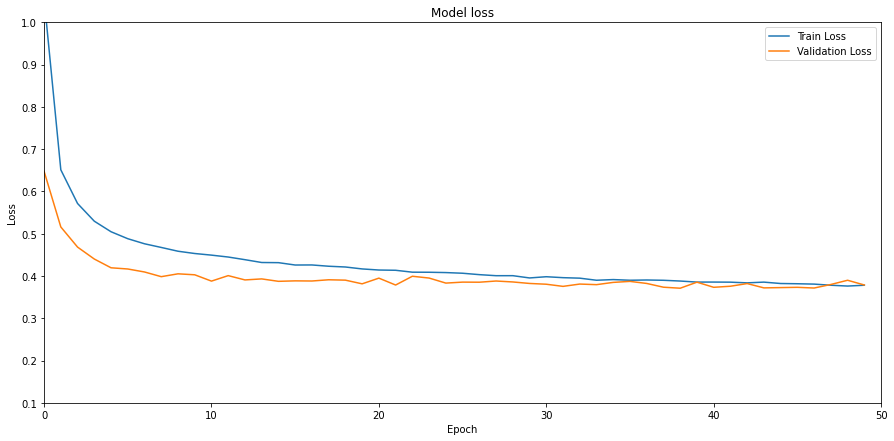

In [ ]:
# summarize history for loss
plt.figure(figsize = (15,7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.1,1.0)
plt.show()

### Neural Network: Model Accuracy on Train and Validation Data

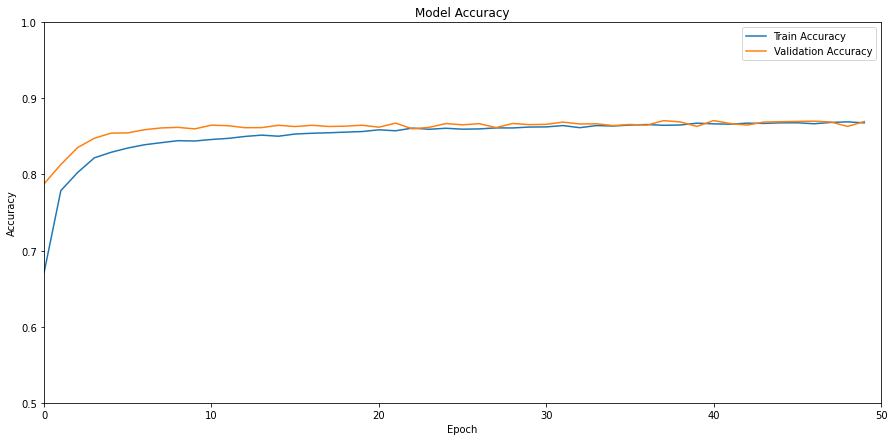

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (15,7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlim(0,50)
plt.ylim(0.5,1.0)
plt.show()

## Predictions on Test Data

### Model Accuracy Results on Test Data

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
scores_test = model_final.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8566


In [ ]:
scores_test = model_final.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1] * 100))

313/313 - 1s - loss: 0.4206 - accuracy: 0.8566 - 517ms/epoch - 2ms/step
Testing Accuracy: 85.66%



### Model Accuracy Results Summary

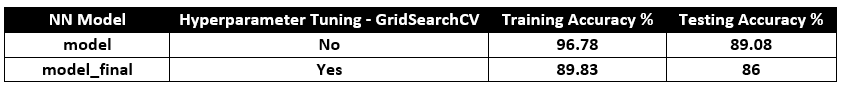

**With the model trained with best hyperparameters, we can use it to make predictions on test data.**

**Accuracy given by Training set is 89.83% and Accuracy given by Testing set is 85.66%.**

**Hence, we can we say that, neural network model is more generalized (learns well) and even performs better on testing data.**




In [ ]:
#Add a softmax layer to convert the model's linear outputs logits to probabilities, which should be easier to interpret.
probability_model = tf.keras.Sequential([model_final, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

In [ ]:
# Model has predicted the label for each image in the testing set. Let's take a look at the first prediction:
predictions[0]

array([0.08551714, 0.08550946, 0.08550968, 0.08550941, 0.08550943,
       0.08579294, 0.08550984, 0.08640984, 0.08551545, 0.22921683],
      dtype=float32)

In [ ]:
#It represents the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 
#We can see which label has the highest confidence value:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. By checking the test label shows that **"Ankle Boot"** classification is correct.

In [ ]:
y_test[0]

9

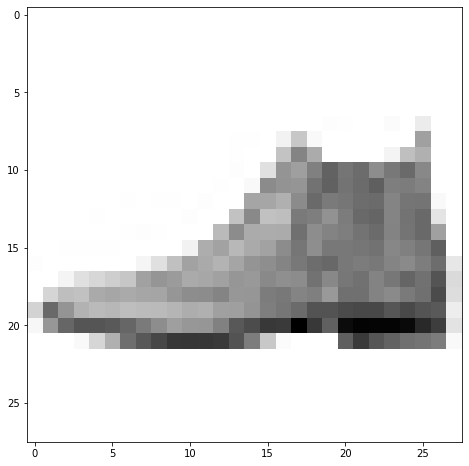

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(X_test[0],cmap = 'Greys');

### Plotting Predictions on Test Data Images

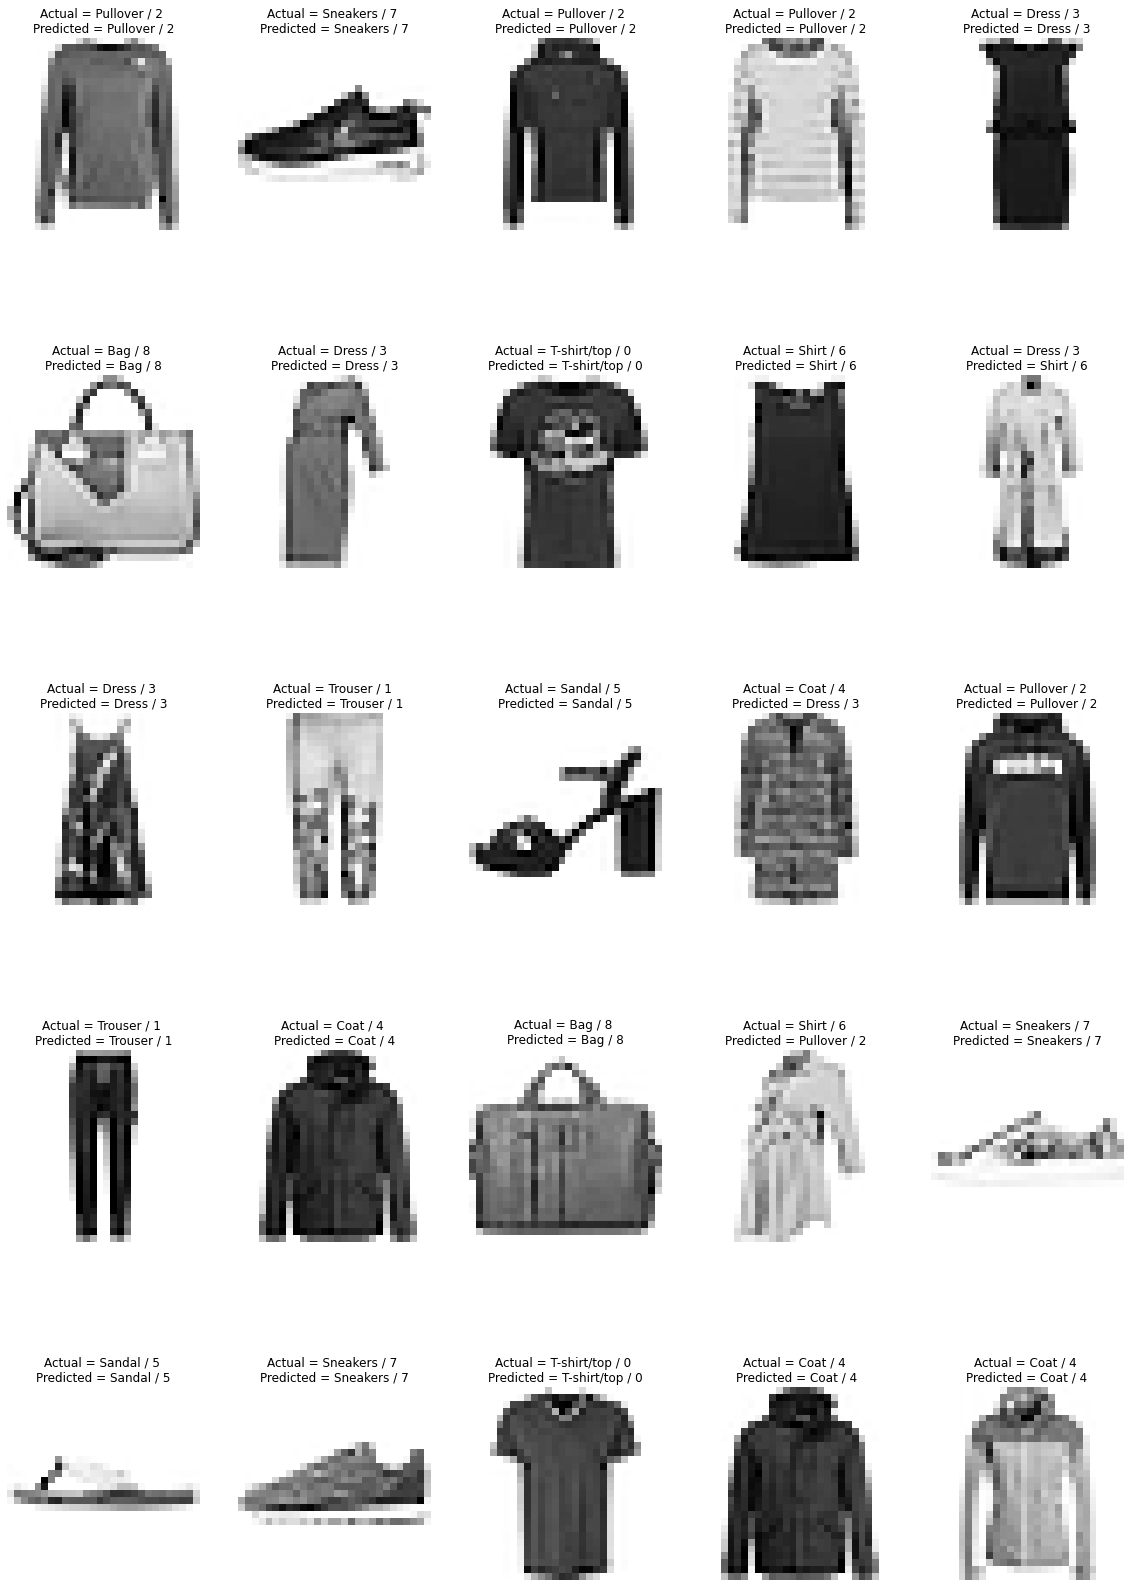

In [ ]:
# Plot the first 25 test images, their predicted labels, and the true labels.
plt.figure(figsize=(20,30))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(predictions[i])],np.argmax(predictions[i])))

### Model Evaluation on Test Data : Confusion Matrix

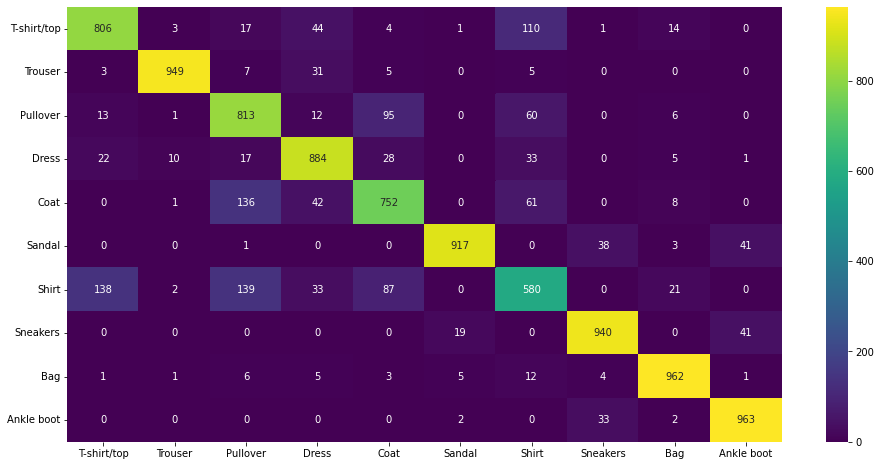

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,8))
y_pred_labels = [np.argmax(label) for label in predictions]
cm = confusion_matrix(y_test,y_pred_labels)

# HeatMap
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels,cmap = 'viridis');

### Model Evaluation: Classification Report on Test Data

In [ ]:
from sklearn.metrics import classification_report
report = classification_report (y_test,y_pred_labels,target_names = class_labels)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.81      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.72      0.81      0.76      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.77      0.75      0.76      1000
      Sandal       0.97      0.92      0.94      1000
       Shirt       0.67      0.58      0.62      1000
    Sneakers       0.93      0.94      0.93      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

